![ine-divider](https://user-images.githubusercontent.com/7065401/92672068-398e8080-f2ee-11ea-82d6-ad53f7feb5c0.png)
<hr>

### Secure RESTful APIs using Python

# Understanding the services provided by a server

In order to complete this project, you should launch the provided server by running the following at a separate terminal on your local system:

```bash
FLASK_APP=project.py flask run --port 5009
```

The port 5009 is not used by any well-known service or protocol, so it is unlikely it will be in use on your system. However, in case it is, you may change the port you launch on and the corresponding projects to find an unused port.  Launching the Flask server will fail if the port has been claimed, and you can try as many others as you like (the entire 5000-5500 range should mostly be available).

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

In [1]:
import requests

## Part 1

**Interacting with unknown media types**

Ideally perform this task without looking at the code of the server you have launched locally.  This simulates exploring how to interact with a service that you may, in fact, not have source code access to, but still wish to utilize.

The running service has an route called `/NASA` that will respond with **something** (something NASA related, specifically).  The specific resource it will return on each call will vary randomly.  Create code that will receive and present in a relevant manner each response of each MIME type that you receive.

If you do not peak at the code, you will need to determine this with some trial-and-error to make sure you can process each type.  For presentation in a notebook, you may want to utilize capatiblities inside the `IPython.display` module.

**A possible solution**

A way you might do it.

Composite picture of Mars


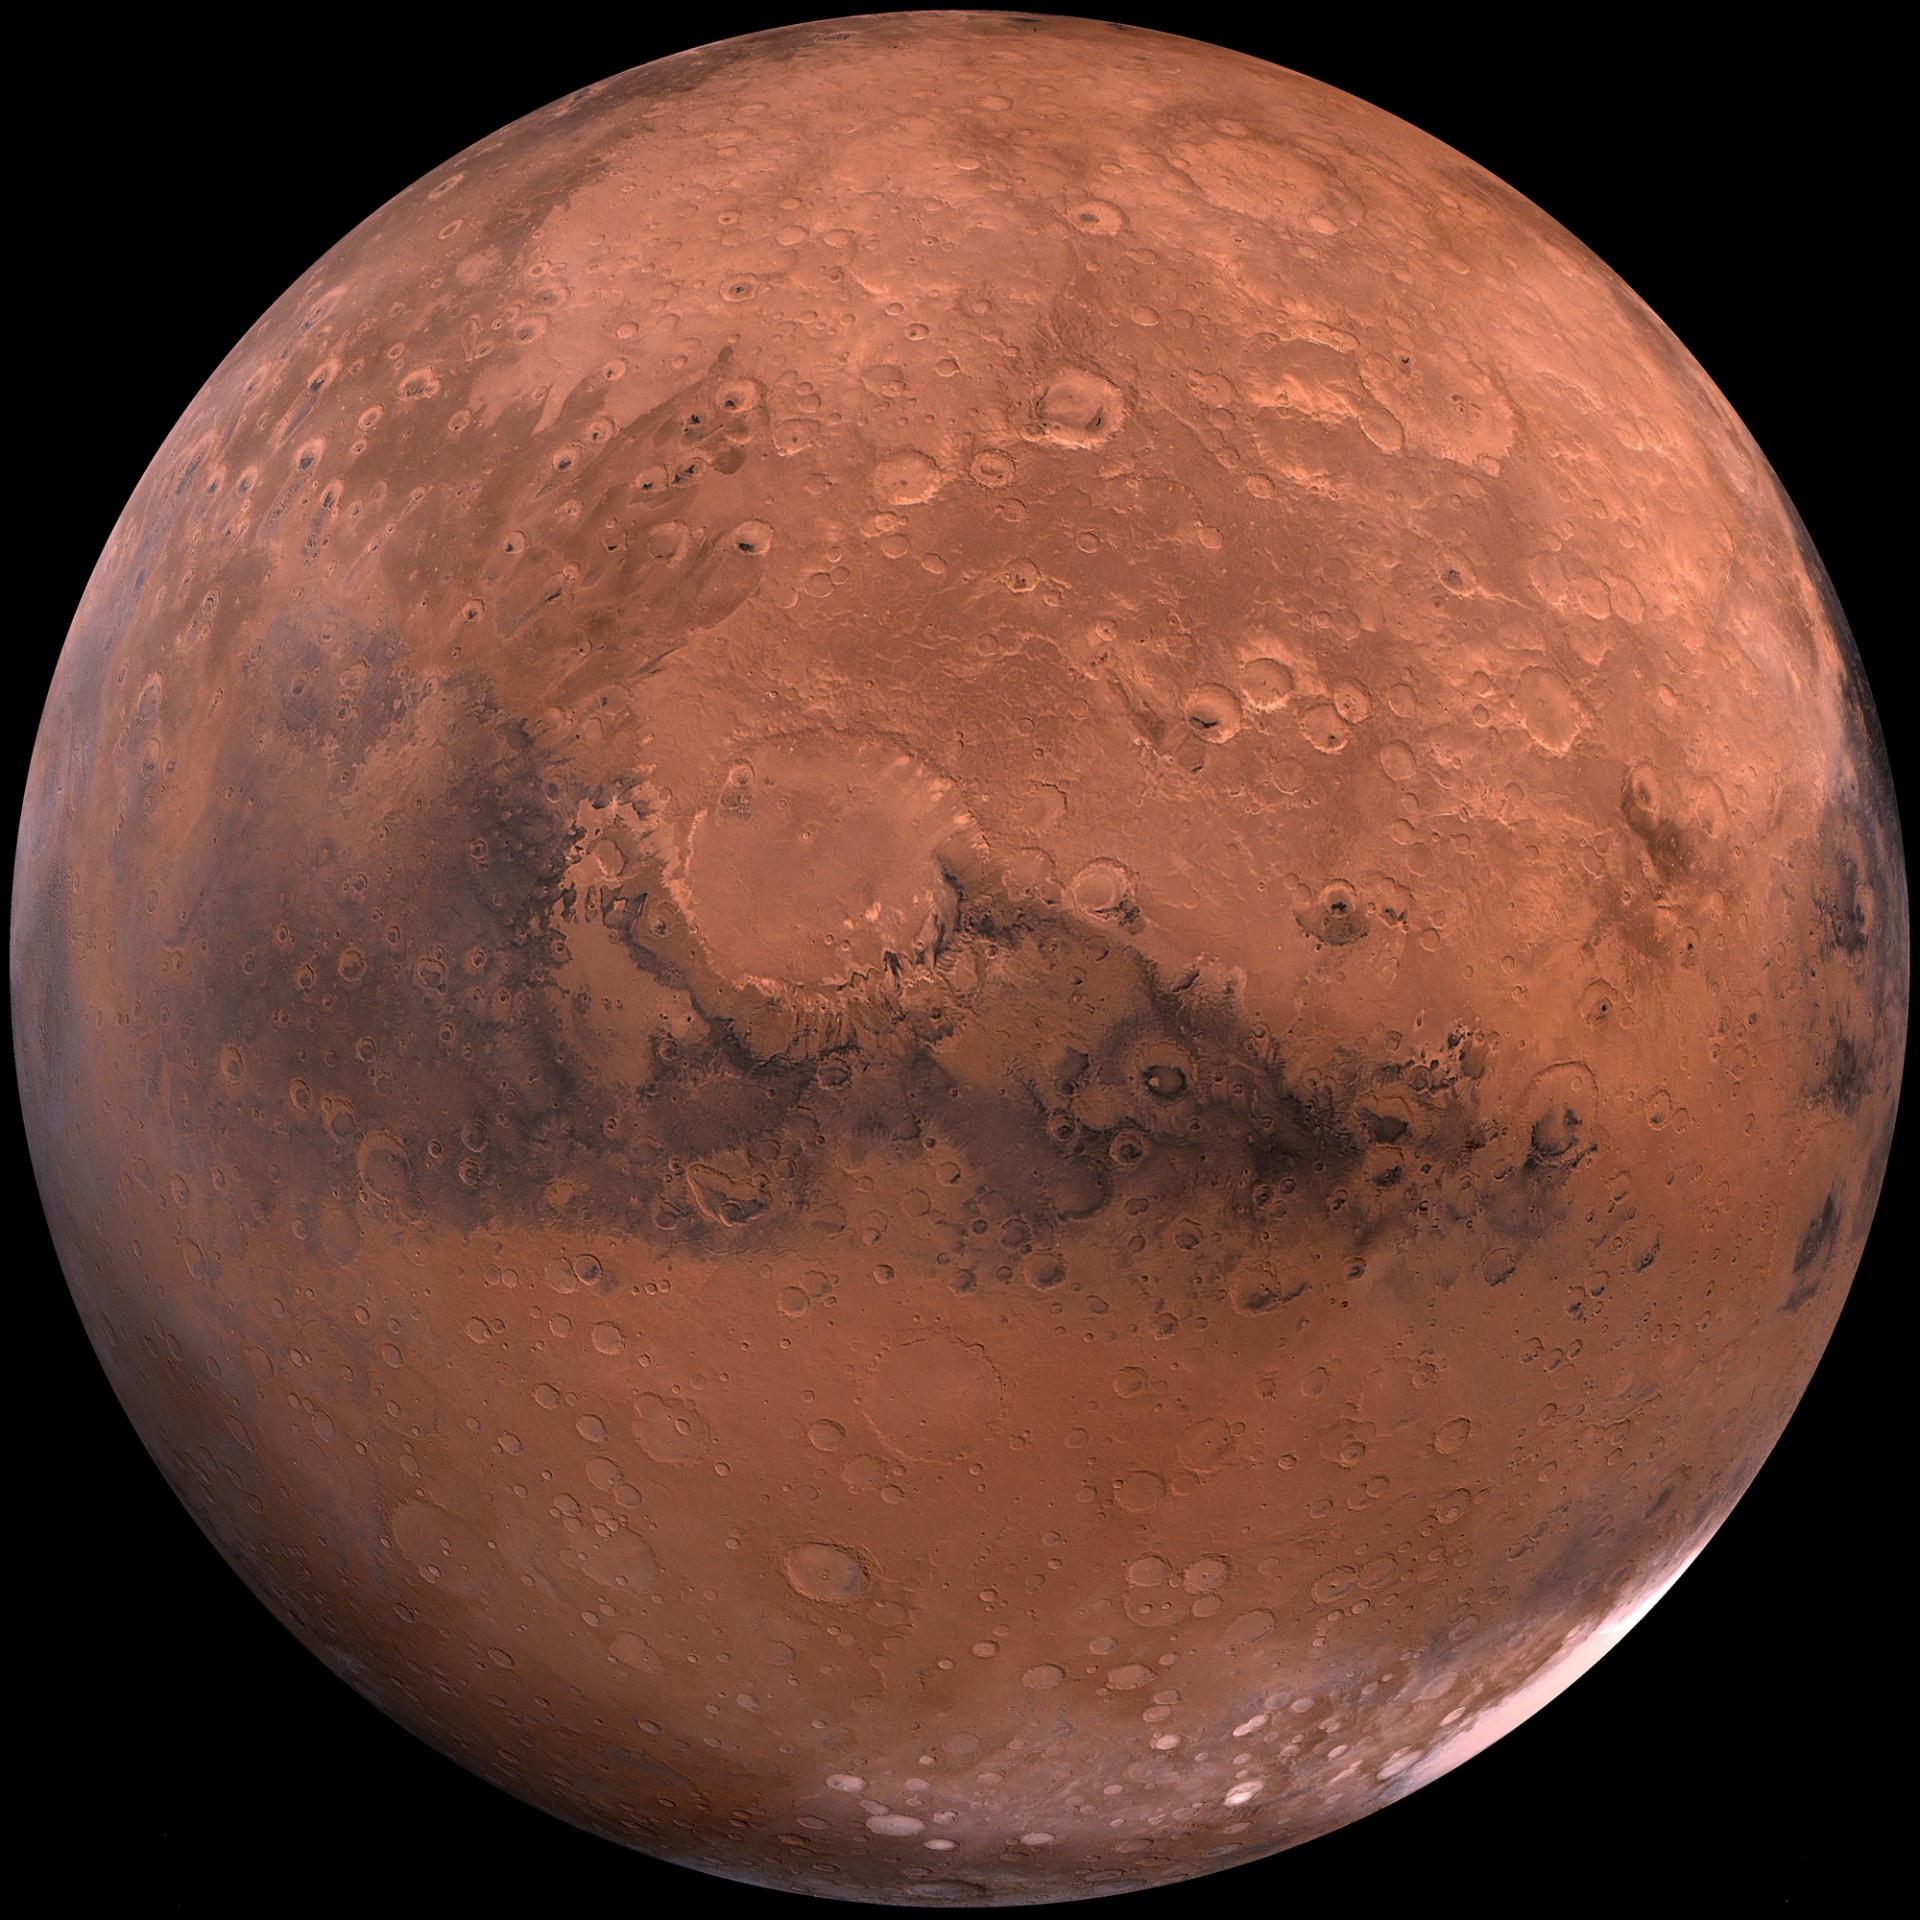

In [2]:
from IPython.display import HTML, Image, Audio, TextDisplayObject, display
import PyPDF2
import io

resp = requests.get("http://localhost:5009/NASA")
mimetype = resp.headers['Content-Type']

if mimetype.startswith('image/'):
    obj = Image(resp.content, width=500)
elif mimetype.startswith('audio/'):
    obj = Audio(data=resp.content)
elif mimetype.startswith('text/html'):
    obj = HTML(resp.text)
elif mimetype.startswith('application/pdf'):
    pdfReader = PyPDF2.PdfFileReader(io.BytesIO(resp.content))
    n = pdfReader.numPages
    page1 = pdfReader.getPage(0).extractText()
    obj = HTML(f'<p>Pages: {n}</p><hr/><pre>{page1}</pre><br/>page 1<hr/>')
    
print(resp.headers['X-Description'])
display(obj)

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Part 2

**Interacting with resource-limited services**

The locally running service has another route names `/Slow-NASA`.  This simulates an overloaded or underpowered server that cannot handle the volume of traffic it receives.  When there is a problem, the service will indicate "503 Service Unavailable" to show that it has fallen behind.  When the server succeeds, what it responds will be identical to the `/NASA` route.

You wish to utilize this service, but not so heavily that it will fail.  Therefore, you'd like to avoid making requests overly frequently; however, determining how frequently is **too** frequently is the purpose of this task.  Again, avoid looking at the code for the running service, stipulating that it is actually running on a machine you do not control.

Keep in mind that just because two specific requests succeed after a certain wait, that doesn't mean that the same wait will *always* be sufficient.  In a real-life server, you are never really guaranteed this; on this toy sample, a sufficiently long wait will allow requests always to succeed.  In this task, you simply want to wait long enough that failures are *very unlikely* (you can determine what constitutes "very" to your own satisfaction. 

Politeness to the external service is certainly a concern.  Flooding the service with requests in the hopes they will succeed eventually is bad manners (and counter-productive for a burdened server).

In [3]:
resp1 = requests.get('http://localhost:5009/Slow-NASA')
resp2 = requests.get('http://localhost:5009/Slow-NASA')
resp3 = requests.get('http://localhost:5009/Slow-NASA')
print(" First request status:", resp1.status_code)
print("Second request status:", resp2.status_code)
print(" Third request status:", resp3.status_code)

 First request status: 200
Second request status: 503
 Third request status: 503


**A possible solution**

Making as many tries as exponential backoff requires can take a while.  This is a kind of test you would run once at the start of an ongoing utilization of a service, retaining the wait timeout for a relatively long time before checking again.

In [4]:
%%time
from time import sleep
wait = 0.0001  # Seconds, start optimistically

# Find long enough wait timeout
while True:
    statuses = []
    # I've decided 4 successful requests in sequence is "very likely"
    for _ in range(4):
        sleep(wait)
        resp = requests.get('http://localhost:5009/Slow-NASA')
        statuses.append(resp.status_code)
        if resp.status_code != 200:
            break
    if all(code == 200 for code in statuses):
        break
    else:
        wait *= 2
        
print(f"Empirically, waiting {wait:0.2f} seconds between requests seems safe.")

Empirically, waiting 6.55 seconds between requests seems safe.
CPU times: user 188 ms, sys: 37.3 ms, total: 226 ms
Wall time: 33.1 s


![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)